In [1]:
import pickle
import matplotlib.pyplot as plot
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm
import numpy as np
import pandas as pd
from sklearn import preprocessing
from pandas import DataFrame
from sklearn.gaussian_process.kernels import RBF
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import pickle
from gplearn.genetic import SymbolicRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.tree import export_graphviz
# import pydotplus
# import graphviz
from io import StringIO
from IPython.display import Image

In [2]:
dataset= r'800_perovskite.csv'
data=pd.DataFrame(pd.read_csv(dataset))

In [3]:
data

,Formation_energy,ICSD_id,of_Atoms,Volume,Stability
0,0.730958,33665,5,91.9981,1.970559
1,-2.916353,28617,5,61.5701,0.015169
2,-1.118824,161481,5,257.4980,0.031003
3,-2.294344,158759,5,66.2214,0.346365
4,-0.809386,44418,5,73.9152,0.000000
...,...,...,...,...,...
675,-0.484671,168713,30,275.7190,0.021687
676,-2.704670,169694,30,322.1190,0.032763
677,-2.361977,23477,20,225.3200,0.010790
678,-0.918313,98497,5,133.7690,0.000000


In [4]:
X = data.values[:, :-1]
y = data.values[:, -1]
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=1)


for i in range(X_train.shape[1]):
    X_train[:, [i]] = preprocessing.MinMaxScaler().fit_transform(X_train[:, [i]])



for i in range(X_test.shape[1]):
    X_test[:, [i]] = preprocessing.MinMaxScaler().fit_transform(X_test[:, [i]])

In [5]:
feature_names = list(data.columns[:-1])

In [6]:
# 定义符号回归模型，并使用训练数据拟合模型
reg = SymbolicRegressor(population_size=5000, generations=100, verbose=1,
                         function_set=['add', 'sub', 'mul', 'div', 'sqrt', 'log', 'abs', 'neg', 
                                       'inv', 'max', 'min', 'sin', 'cos', 'tan'],
                         metric='mean absolute error', stopping_criteria=0.001,
                         random_state=0)
reg.fit(X_train, y_train)

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    11.20           9.2087        6          0.16831              N/A      3.47m
   1     8.54          1.43745       43         0.163117              N/A      3.66m
   2     5.11          1.89984        9         0.131355              N/A      3.45m
   3     2.58         0.420961        9         0.131355              N/A      3.35m
   4     1.15         0.182903        9         0.131355              N/A      3.29m
   5     1.27         0.192327       14          0.11696              N/A      3.23m
   6     2.41         0.194916       12         0.115434              N/A      3.16m
   7     7.06         0.188243       15         0.111222              N/A      3.39m
   8    12.79         0.154874       13         0.109414              N/A  

SymbolicRegressor(function_set=['add', 'sub', 'mul', 'div', 'sqrt', 'log',
                                'abs', 'neg', 'inv', 'max', 'min', 'sin', 'cos',
                                'tan'],
                  generations=100, population_size=5000, random_state=0,
                  stopping_criteria=0.001, verbose=1)

In [7]:
from sklearn.metrics import mean_absolute_error
# 预测测试数据
y_pred = reg.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)

MAE: 0.16126403657405897


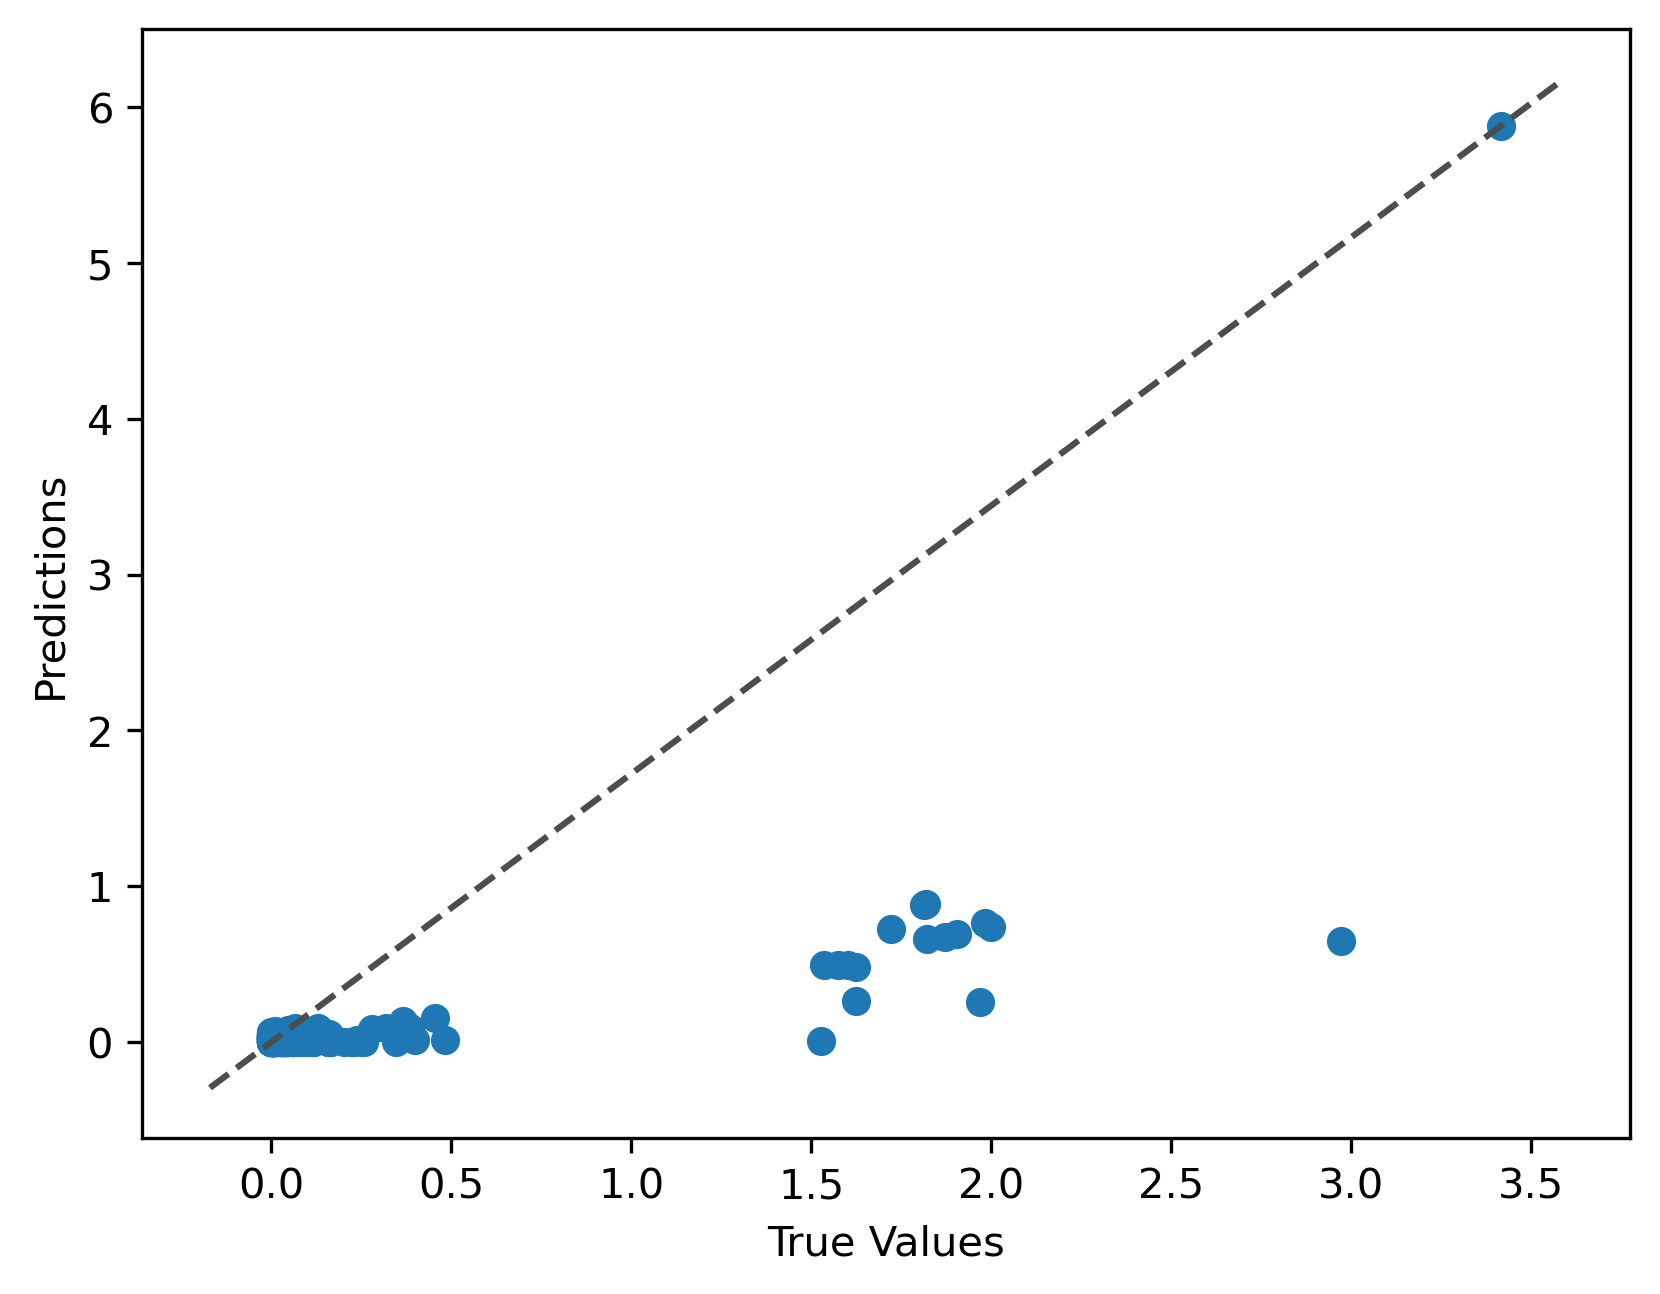

In [8]:
# 绘制预测值和真实值的散点图
fig = plt.figure(dpi=300)
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')

# 绘制一条参考线，x=y，表示预测值等于真实值的情况
plt.plot([plt.xlim()[0], plt.xlim()[1]], [plt.ylim()[0], plt.ylim()[1]], ls="--", c=".3")
plt.savefig('figure.png')
plt.show()

In [18]:
dataset= r'800_perovskite.csv'
data1=pd.DataFrame(pd.read_csv(dataset))

In [13]:
X = data1.values[:, :-1]
y = data1.values[:, -1]
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=1)


for i in range(X_train.shape[1]):
    X_train[:, [i]] = preprocessing.MinMaxScaler().fit_transform(X_train[:, [i]])



for i in range(X_test.shape[1]):
    X_test[:, [i]] = preprocessing.MinMaxScaler().fit_transform(X_test[:, [i]])

In [19]:
feature_names = list(data1.columns[:-1])

In [20]:
# 定义符号回归模型，并使用训练数据拟合模型
reg = SymbolicRegressor(population_size=5000, generations=10, verbose=1,
                         function_set=['add', 'sub', 'mul', 'div', 'sqrt', 'log', 'abs', 'neg', 
                                       'inv', 'max', 'min', 'sin', 'cos', 'tan'],
                         metric='mean absolute error', stopping_criteria=0.001,
                         random_state=0)
reg.fit(X_train, y_train)

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    11.20          9.97225        6         0.167051              N/A     18.60s
   1     8.46          1.40897       43         0.160581              N/A     18.02s
   2     5.08          1.74999        9         0.121162              N/A     14.87s
   3     2.76         0.397089        9         0.121162              N/A     12.32s
   4     1.72          0.19047       12         0.112384              N/A     10.24s
   5     3.69         0.211208       14        0.0999222              N/A      8.23s
   6     9.69         0.168495       17        0.0995796              N/A      6.57s
   7    13.73         0.150096       16        0.0970496              N/A      5.25s
   8    13.94         0.155367       19        0.0896118              N/A  

SymbolicRegressor(function_set=['add', 'sub', 'mul', 'div', 'sqrt', 'log',
                                'abs', 'neg', 'inv', 'max', 'min', 'sin', 'cos',
                                'tan'],
                  generations=10, population_size=5000, random_state=0,
                  stopping_criteria=0.001, verbose=1)

In [21]:
from sklearn.metrics import mean_absolute_error
# 预测测试数据
y_pred = reg.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)

MAE: 0.11150482515377894


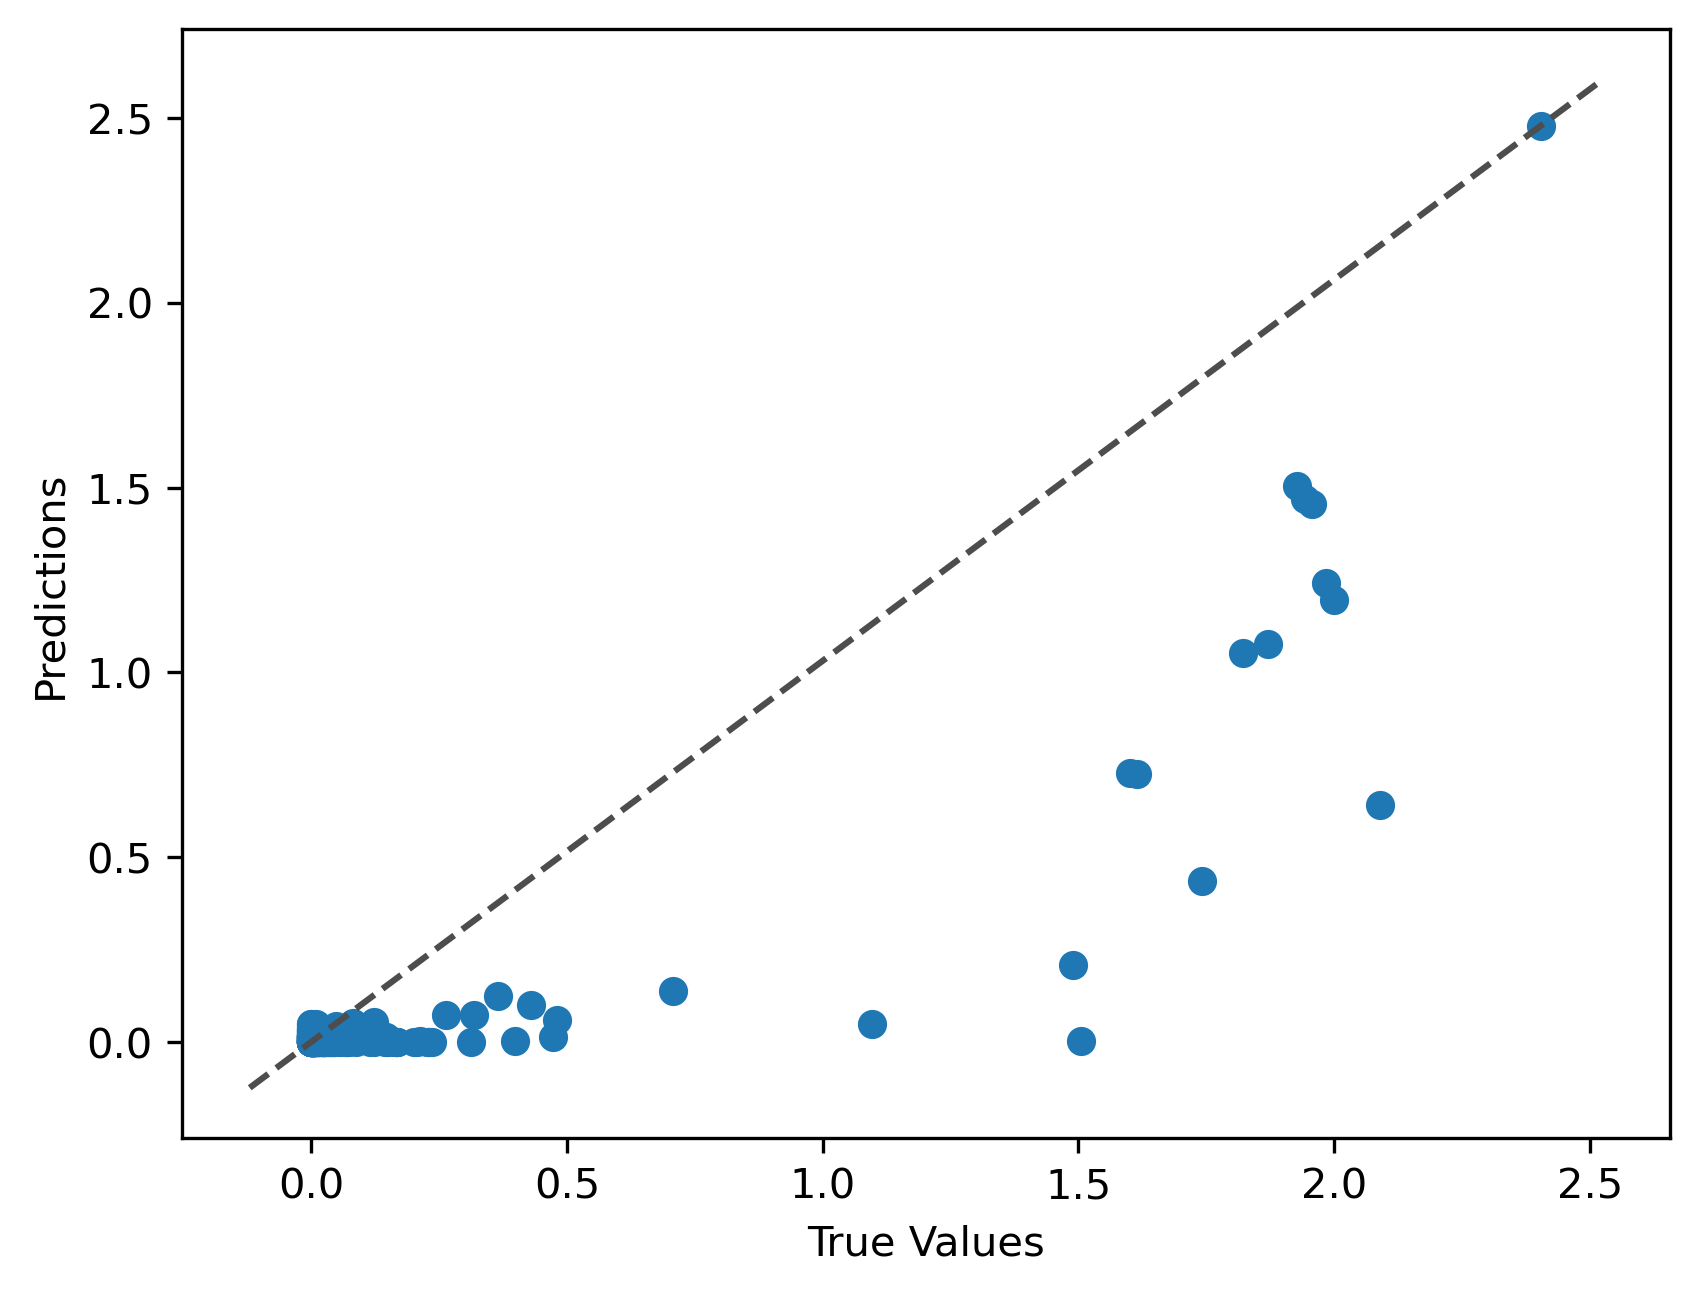

In [22]:
# 绘制预测值和真实值的散点图
fig = plt.figure(dpi=300)
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')

# 绘制一条参考线，x=y，表示预测值等于真实值的情况
plt.plot([plt.xlim()[0], plt.xlim()[1]], [plt.ylim()[0], plt.ylim()[1]], ls="--", c=".3")
plt.savefig('figure.png')
plt.show()